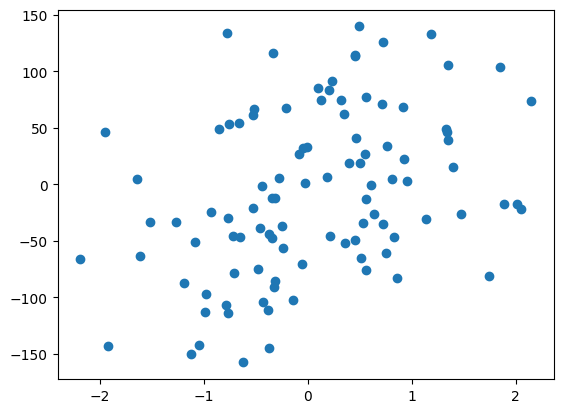

In [113]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
x,y=make_regression(n_samples=100,n_features=1,n_targets=1,noise=80,random_state=13)
plt.scatter(x,y)

## FOR ONLY B AND M IS MADE CONSTANT

[28.48743864]
-9.17897823470792


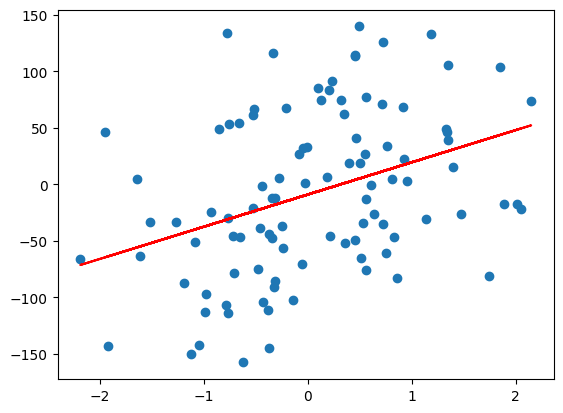

In [114]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)
print(reg.coef_)
print(reg.intercept_)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='ols')


nan
[-29.47316351 -21.63213828 -22.10522135  17.96472533  -2.40301766
  15.35472794 -16.1107199   -3.91034182 -29.71841219 -21.42564497
  48.22950136   2.13740968  -3.25928697 -15.800196   -31.07519332
   3.73034995   9.04967719   1.06317597 -55.18926723  40.65243992
 -31.65525467 -23.76355244 -35.62487101  52.07992459 -15.08584004
 -55.87255121 -18.82534497 -18.35545615 -22.8920169  -24.0825867
  11.38795704  12.63986578   3.73953507 -45.11890019 -71.48429037
 -42.94852382  -2.98433743  28.7183435  -40.14999709   6.83841761
 -52.27606062  -9.24703545 -17.10231821   3.69199804  24.74116515
  17.09624409  14.03815444 -26.8690994   16.85115402  23.2492146
  32.94499097 -27.72590973 -19.88797506 -31.24705839   5.0971397
  29.28441671  11.59307837 -11.50502193 -33.51132321   4.08642467
 -10.44675695 -10.8179286   44.74039958 -38.95909509   6.90657615
 -63.99335247 -30.94434906  -5.55243385  -9.94163397 -13.31567716
   6.85508502  -0.1384633   11.07487261  12.29389522 -19.7226373
  29.13952

C:\Users\anshu\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

C:\Users\anshu\AppData\Local\Temp\ipykernel_16776\4062320250.py:8: RuntimeWarning:

invalid value encountered in scalar subtract



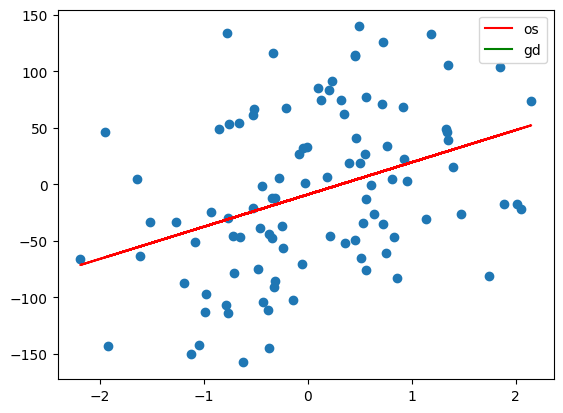

In [115]:
b=100
m=reg.coef_

d=10
while abs(d)>=.001:
   slope=-2*(np.sum(y-m*x.ravel()-b))
   b_old=b
   b=b-.1*slope
   b_new=b
   y_pred=((m*x)+b).reshape(100)
   
   
   d=b_old-b_new
   
plt.plot(x,reg.predict(x),color='red',label='os')
plt.plot(x,y_pred,color='green',label='gd')
print(b)
plt.legend()
plt.scatter(x,y)
print(reg.predict(x))
#print(y_pred-reg.predict(x))



##FOR BOTH M AND B

BATCH GRADIENT METHOD.here the whole data is used as a training set.it is expensive 

In [116]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

x,y=make_regression(n_samples=100,n_features=2,n_targets=1,noise=80,random_state=13)
df=pd.DataFrame({'f1':x[:,0],'f2':x[:,1],'target':y})
fig= px.scatter_3d(df,x='f1',y='f2',z='target')
fig.show()


In [10]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LinearRegression

# Generate synthetic regression data
x, y = make_regression(n_samples=100, n_features=2, n_targets=1, noise=80, random_state=13)
reg=LinearRegression()
reg.fit(x,y)
print(reg.coef_)
print(reg.intercept_)
df=pd.DataFrame({'f1':x[:,0],'f2':x[:,1],'target':y})
fig= px.scatter_3d(df,x='f1',y='f2',z='target')
fig.show()
d1=10
d2=10
d3=10
m1=100
m2=100
b=10
convergence_threshold=.001


while abs(d1) >= convergence_threshold and abs(d2) >= convergence_threshold and abs(d3) >= convergence_threshold:
    b_old=b
    m1_old=m1
    m2_old=m2
    b=b-.001*(-2*(np.sum(y-m1*x[:,0]-m2*x[:,1]-b)))
    b_new=b
    d1=b_old-b_new
    m1=m1-.001*(-2*(np.sum((y-m1*x[:,0]-m2*x[:,1]-b)*x[:,0])))
    m1_new=m1
    d2=m1_old-m1_new
    m2=m2-.001*(-2*(np.sum((y-m2*x[:,1]-m1*x[:,0]-b)*x[:,1])))
    m2_new=m2
    d3=m2_old-m2_new
    y_pred=(m1*x[:,0]+m2*x[:,1]+b).reshape(100)
df2=pd.DataFrame({'f1':x[:,0],'f2':x[:,1],'target':y_pred})
fig2= px.scatter_3d(df2,x='f1',y='f2',z='target')
fig2.show()
print(m1,m2,b)



[89.42375266 34.94993604]
-2.2390729920384596


89.43281449134746 34.96597129349031 -2.2341310395652787


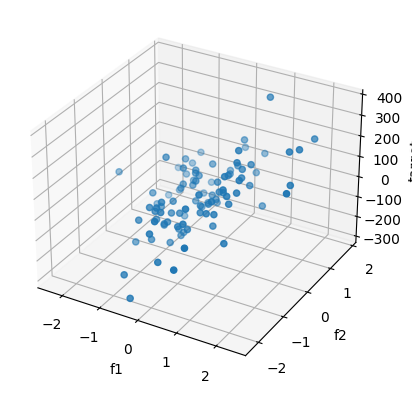

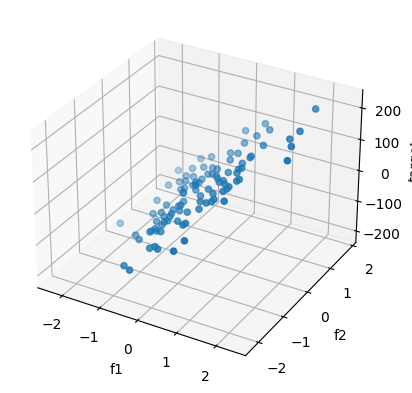

In [118]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

x, y = make_regression(n_samples=100, n_features=2, n_targets=1, noise=80, random_state=13)

# Scatter plot of original data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('target')
plt.show()

# Gradient Descent
d1 = 10
d2 = 10
d3 = 10
m1 = 100
m2 = 100
b = 0

while abs(d1) >= 0.001 and abs(d2) >= 0.001 and abs(d3) >= 0.001:
    b_old = b
    m1_old = m1
    m2_old = m2
    
    # Update parameters
    b = b - 0.01 * (-2 * np.sum(y - m1 * x[:, 0] - m2 * x[:, 1] - b))
    m1 = m1 - 0.01 * (-2 * np.sum((y - m1 * x[:, 0] - m2 * x[:, 1] - b) * x[:, 0]))
    m2 = m2 - 0.01 * (-2 * np.sum((y - m2 * x[:, 1] - m1 * x[:, 0] - b) * x[:, 1]))
    
    # Calculate differences for convergence check
    d1 = b_old - b
    d2 = m1_old - m1
    d3 = m2_old - m2
    
    # Calculate predicted values
    y_pred = m1 * x[:, 0] + m2 * x[:, 1] + b
    
    # Scatter plot of predicted values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y_pred)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('target')
plt.show()


In [11]:

from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X,y = load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
reg = LinearRegression()
reg.fit(X_train,y_train)
LinearRegression()
print(reg.coef_)
print(reg.intercept_)

y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)


print(X_train.shape)
print(y_train.shape)

class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            #coef_der=-2*np.dot(X_train.T,(y_train-y_hat))/ X_train.shape[0]
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0] #y_train is a vector
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
gdr = GDRegressor(epochs=1000,learning_rate=0.5)
gdr.fit(X_train,y_train)

y_pred = gdr.predict(X_test)
r2_score(y_test,y_pred)

 

(442, 10)
(442,)
[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167
(353, 10)
(353,)
152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


0.4534503034722803

##STOCHASTIC GRADIENT DESCENT. here for each itteration a random data is selected and variables are updated accordingly. 


In [1]:

from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time
X,y = load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
reg = LinearRegression()
reg.fit(X_train,y_train)
LinearRegression()
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)
class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
sgd = SGDRegressor(learning_rate=0.01,epochs=40)
start = time.time()
sgd.fit(X_train,y_train)
print("The time taken is",time.time() - start)
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)
reg.fit(X_train,y_train)
SGDRegressor(learning_rate='constant', max_iter=100)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)
0.43059547063734904
 
 

(442, 10)
(442,)
[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167
151.7726631054035 [  60.57825478  -50.95760179  311.71971212  217.29151828   19.09117706
  -15.88495348 -175.51006529  137.79041137  289.40486785  128.85549887]
The time taken is 0.15540027618408203


C:\Users\anshu\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.43059547063734904